In [1]:
#Installing Importatnt Liabraries
!pip install nltk
!pip install wordcloud
!pip install eli5

In [2]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('train.csv')
df.head()

In [4]:
df1=pd.read_csv('test.csv')
df1.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
#Checking Shape of train Data
df.shape

(159571, 8)

In [6]:
#Checking shape of test data
df1.shape

(153164, 2)

In [7]:
#Checking Info for train data
df.info

<bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  

In [8]:
#Checking infor for teat data
df1.info

<bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [9]:
#Checking the Details of the train data
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Checking the details of the test data
df1.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,a07bd1f74e0d7821,::Thanks for your response. The source you gi...
freq,1,1


In [11]:
#Checking Unique values
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [12]:
#Checking unique values
df.nunique

<bound method DataFrame.nunique of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignan

In [13]:
#Checking unique vale of test data 
df1.nunique()

id              153164
comment_text    153164
dtype: int64

In [14]:
#Checking unique value of test data
df1.nunique

<bound method DataFrame.nunique of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [15]:
#Checking null value of train data
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

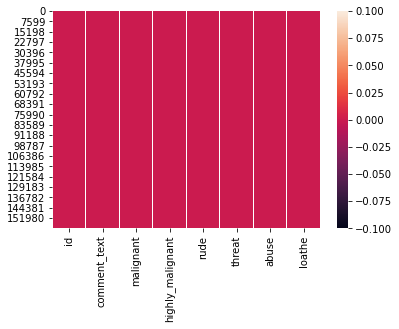

In [16]:
#Creating heat map of null value
sns.heatmap(df.isnull())

In [17]:
# Checking null value of test data
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

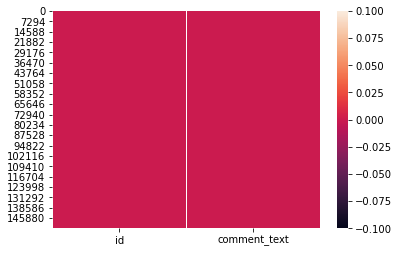

In [18]:
#checking null value of test data
sns.heatmap(df1.isnull())

In [19]:
#checking correlations between differnet data columns 
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


a). malignant data is highly correlated with rude and abuse data columns
b). highly_manlignant is not highly correlated with any columns
c). rude column data is highly correlated with malignant and abuse data. 
d). threat data is not highly correlated with any column
e). abuse data is highly correlated with abuse and rude data
f). loathe data is not correlated with any data

<AxesSubplot:>

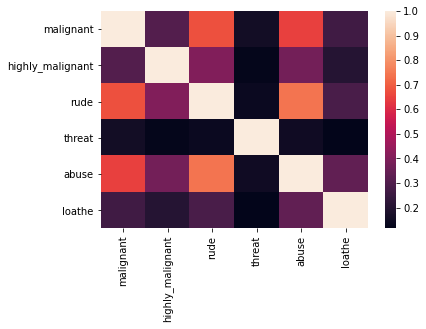

In [20]:
sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'malignant'}>,
        <AxesSubplot:title={'center':'highly_malignant'}>,
        <AxesSubplot:title={'center':'rude'}>,
        <AxesSubplot:title={'center':'threat'}>],
       [<AxesSubplot:title={'center':'abuse'}>,
        <AxesSubplot:title={'center':'loathe'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

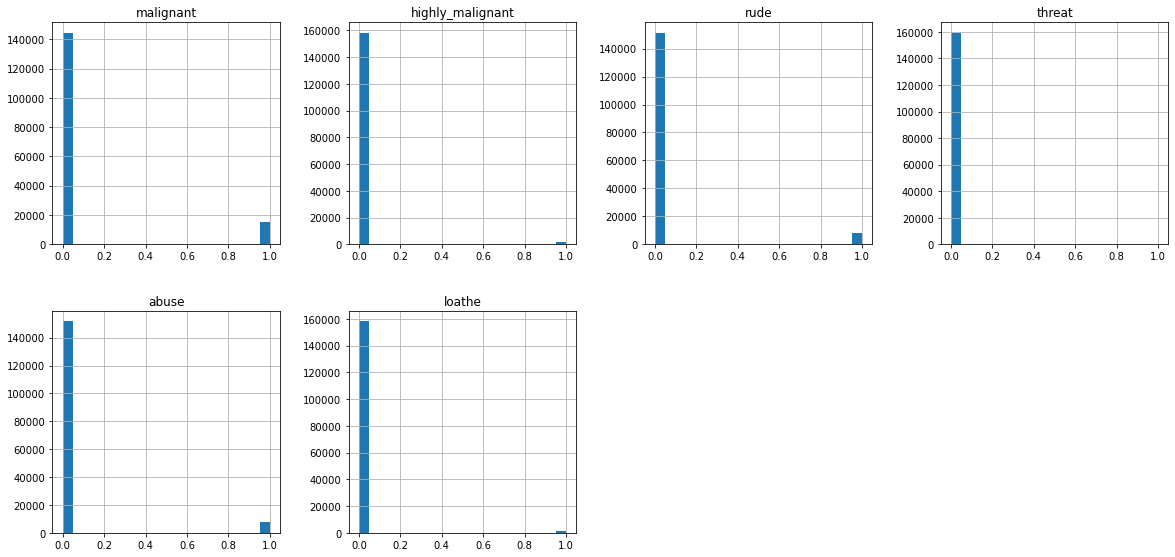

In [21]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=20)

In [22]:
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [ ]:
#all the columns are highly skewed. 

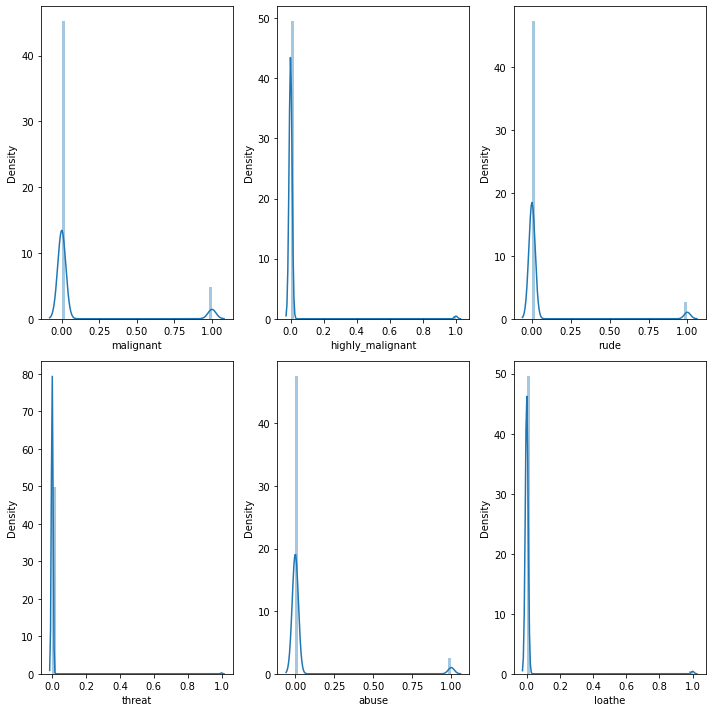

In [23]:
col=["malignant","highly_malignant","rude","threat","abuse","loathe"]
ncol=3
nrows=2
plt.figure(figsize=(10,10))
for i in range(0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[col[i]])
    plt.tight_layout()

Text(0.5, 1.0, 'Malignant Details')

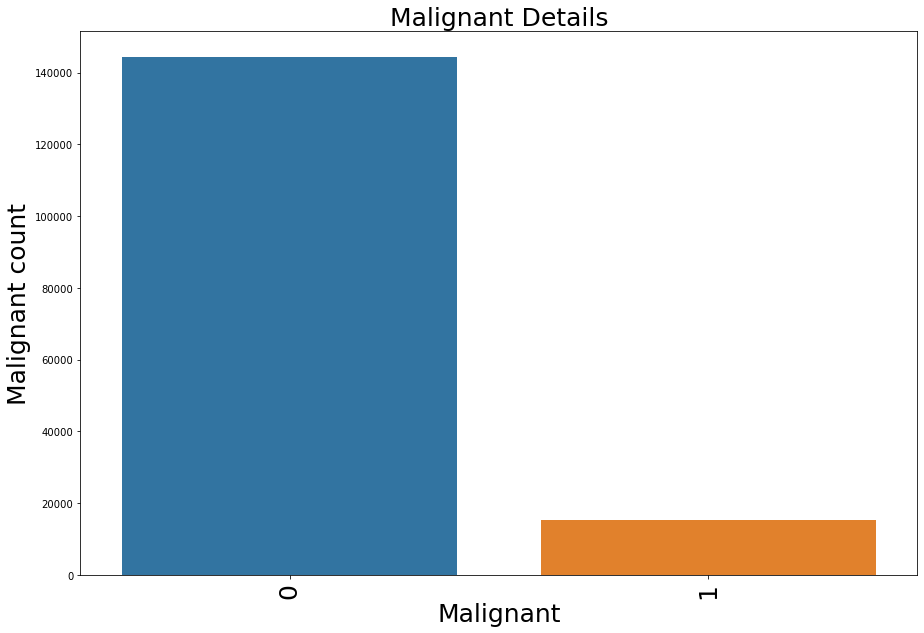

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x="malignant",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("Malignant",fontsize=25)
plt.ylabel("Malignant count",fontsize=25)
plt.title("Malignant Details",fontsize=25)

In [ ]:
#Total Malignant words/comments  are 15294 out of total 159571 which is just 9.58%.  

Text(0.5, 1.0, 'highly_malignant Count Details')

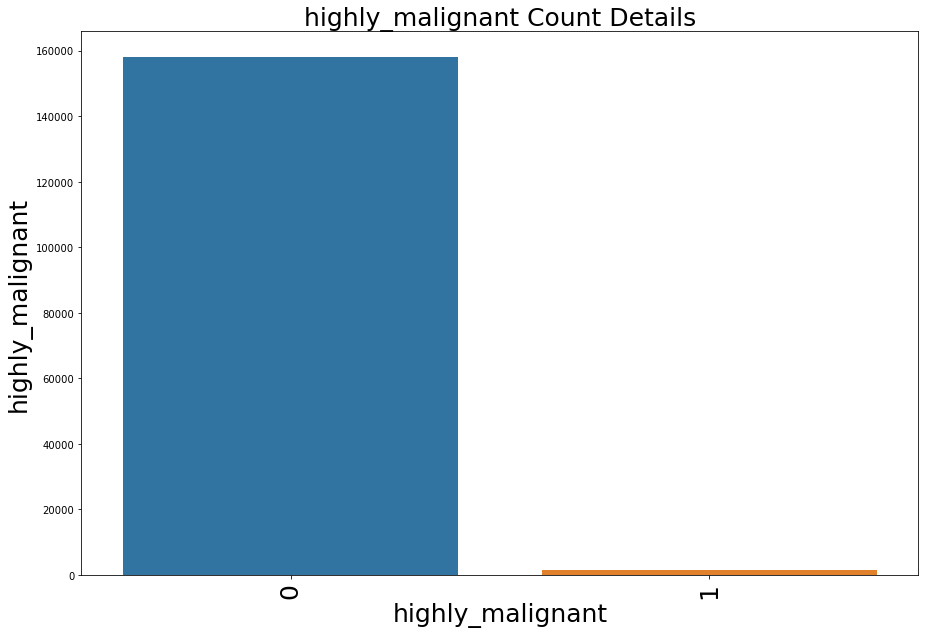

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x="highly_malignant",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("highly_malignant",fontsize=25)
plt.ylabel("highly_malignant",fontsize=25)
plt.title("highly_malignant Count Details",fontsize=25)

In [1]:
#Highly_Malignant words/comments  are 1595 out of total 159571 which is just 1.00%.  

Text(0.5, 1.0, 'rude Count Details')

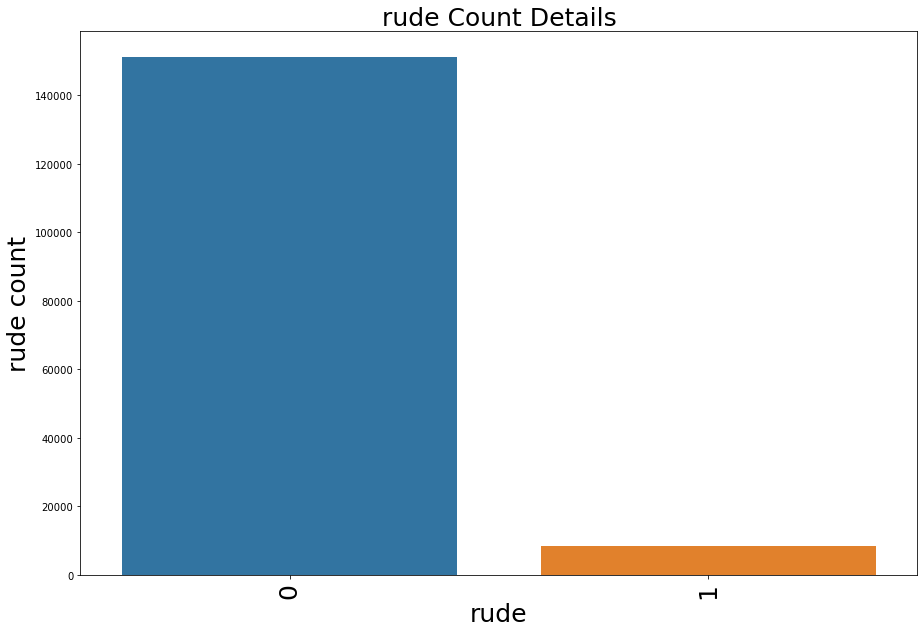

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x="rude",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("rude",fontsize=25)
plt.ylabel("rude count",fontsize=25)
plt.title("rude Count Details",fontsize=25)

In [2]:
# the count of rude label comments are 8449 which is 5.29% of total comments 

Text(0.5, 1.0, 'threat Details')

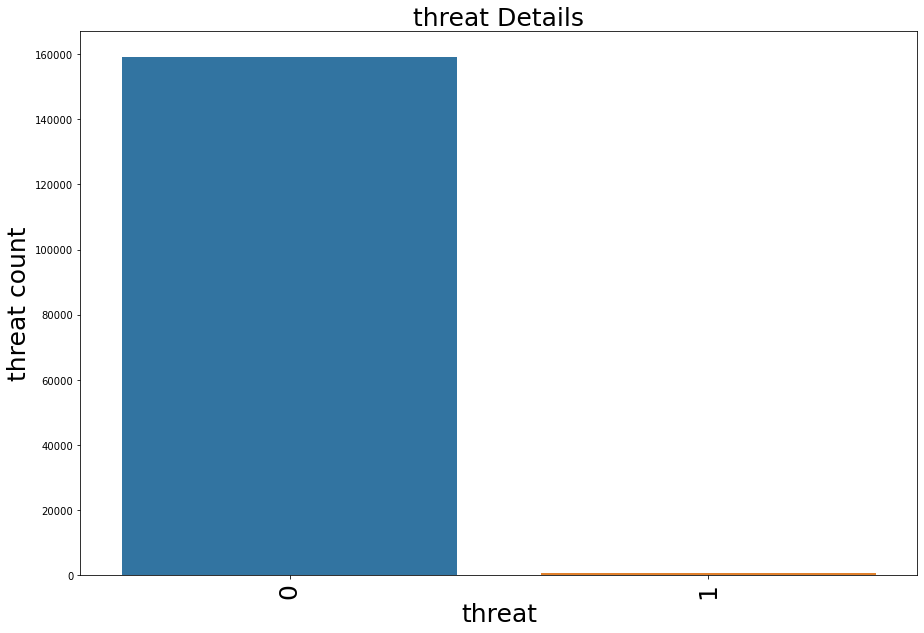

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x="threat",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("threat",fontsize=25)
plt.ylabel("threat count",fontsize=25)
plt.title("threat Details",fontsize=25)

In [ ]:
# the count of threat label comments are 478 which is 0.30% of total comments 

Text(0.5, 1.0, 'abuse Details')

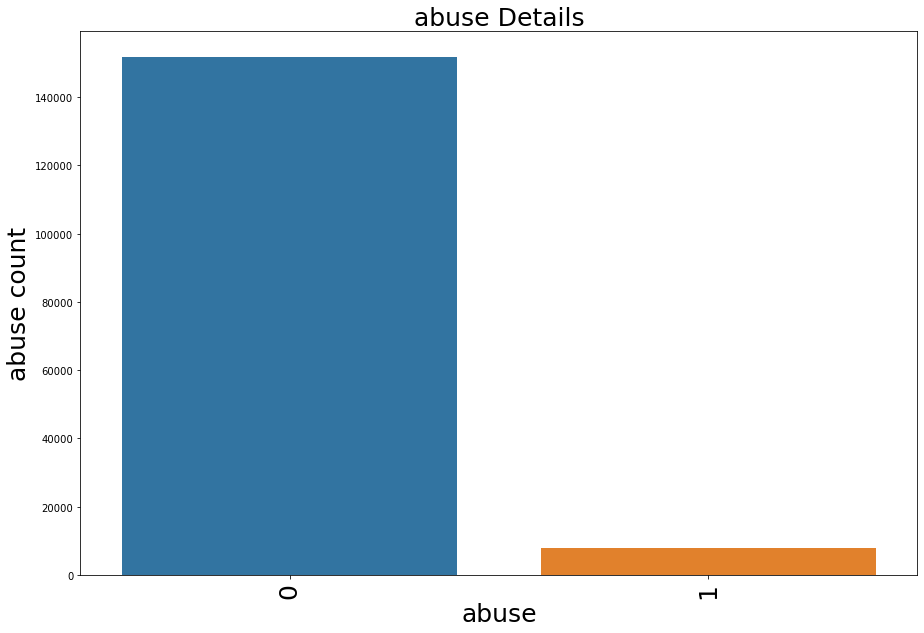

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x="abuse",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("abuse",fontsize=25)
plt.ylabel("abuse count",fontsize=25)
plt.title("abuse Details",fontsize=25)

In [ ]:
#Total abusive comments are 7877 which is 4.94% of total comments

Text(0.5, 1.0, 'loathe Details')

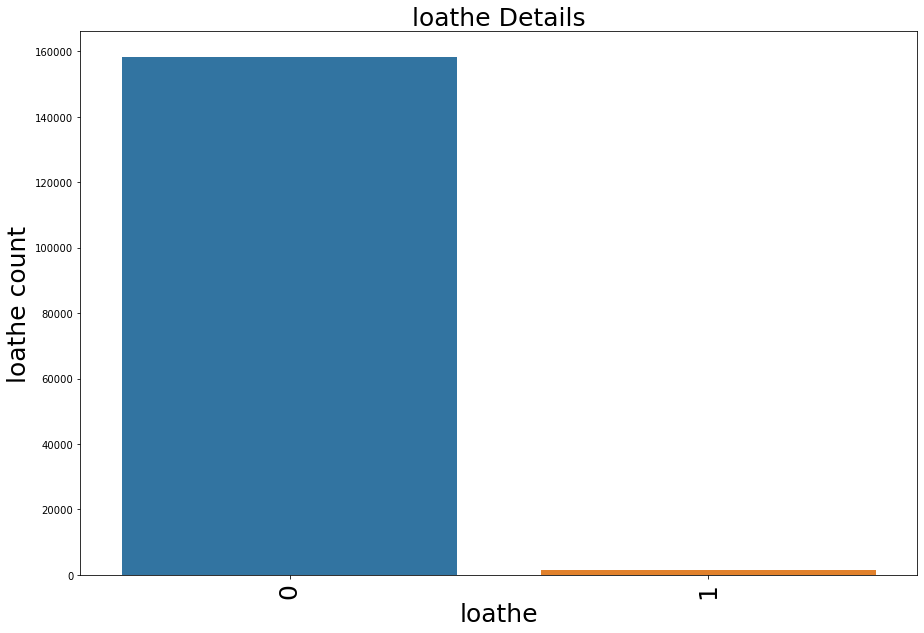

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x="loathe",data=df)
plt.xticks(rotation=90,fontsize=25)
plt.xlabel("loathe",fontsize=25)
plt.ylabel("loathe count",fontsize=25)
plt.title("loathe Details",fontsize=25)

In [ ]:
#Total abusive comments are 1405 which is 0.88% of total comments

In [30]:
import nltk
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Do

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nlt

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Shonali
[nltk_data]    |     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_da

In [31]:
df['length'] = df['comment_text'].str.len()

In [32]:
df.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [33]:
# Convert all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()

# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [34]:
df['clean_length'] = df.comment_text.str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [35]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


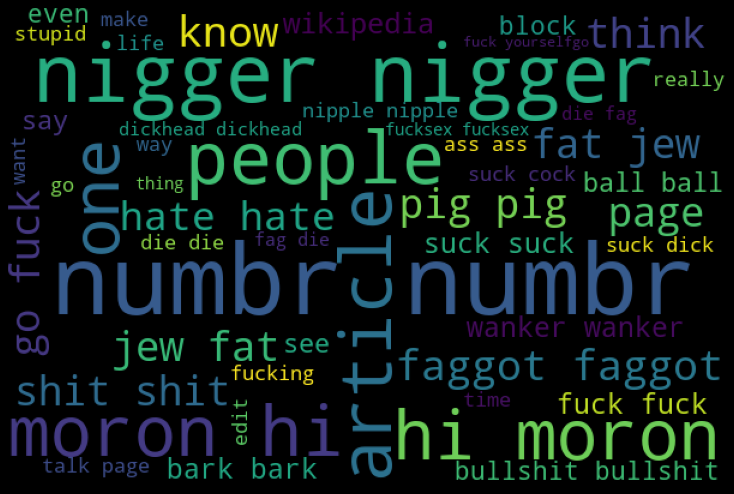

In [36]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

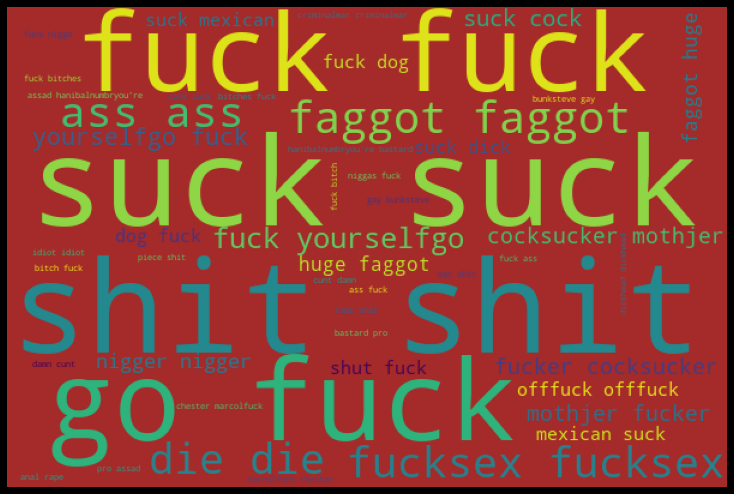

In [37]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='brown',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

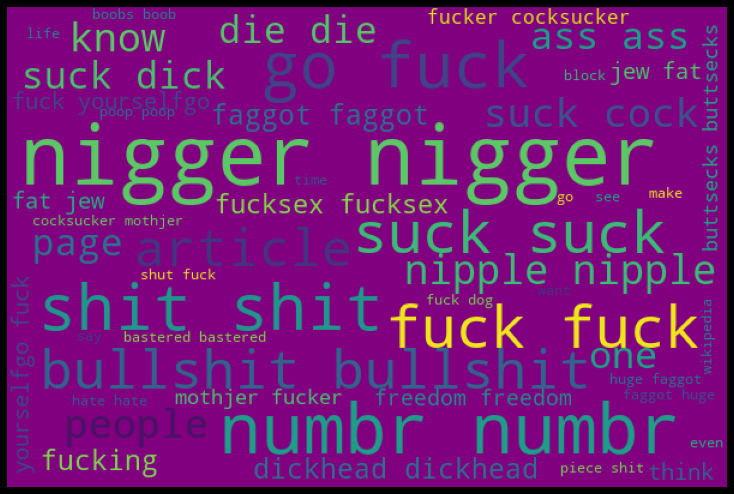

In [38]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='purple',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

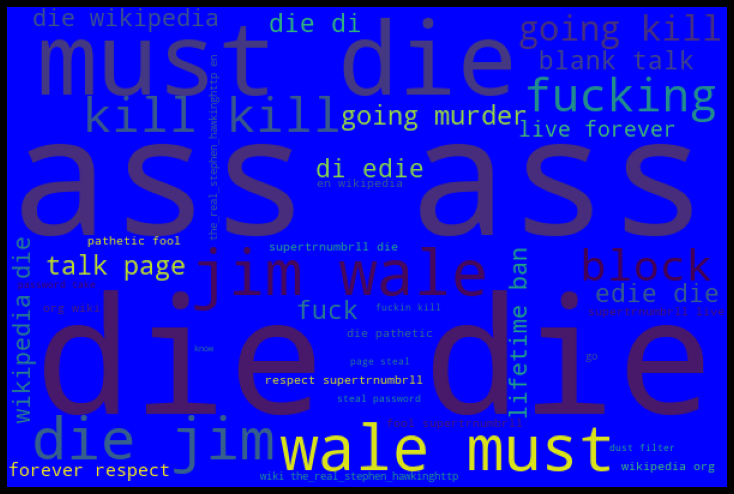

In [39]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='blue',max_words=40).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

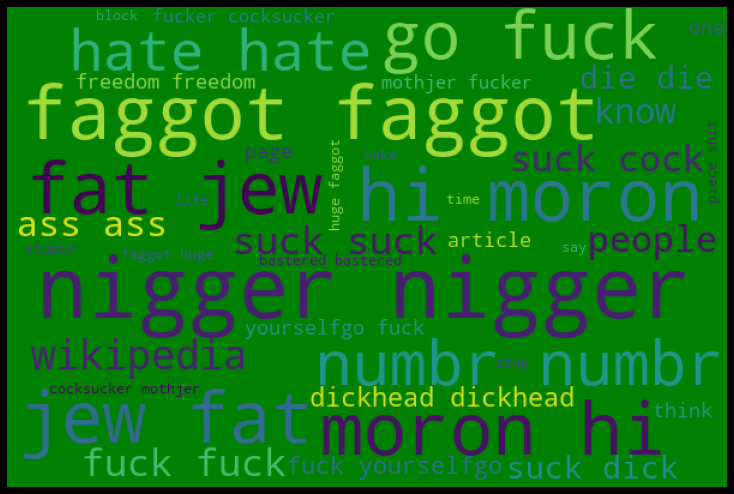

In [40]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='green',max_words=40).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

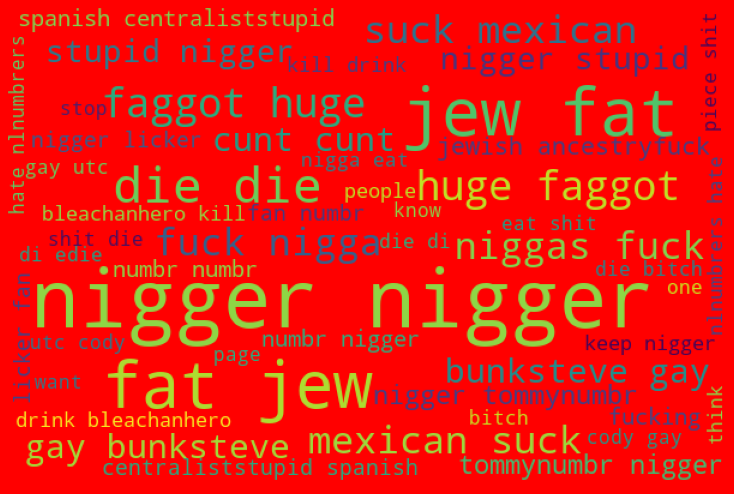

In [41]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='red',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

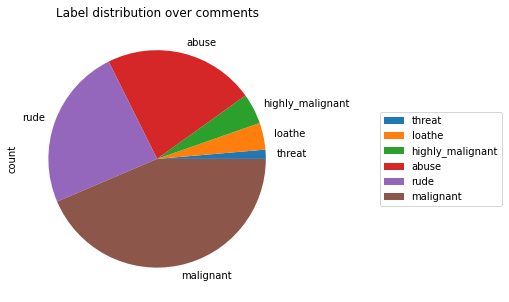

In [42]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [43]:
target_data = df[cols_target]

df['bad'] =df[cols_target].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [44]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and second time asking, view completely ...",0,0,0,0,0,0,295,211,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page. numbr.numbr,0,0,0,0,0,0,99,49,0
159568,ffee36eab5c267c9,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0,81,68,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,116,60,0


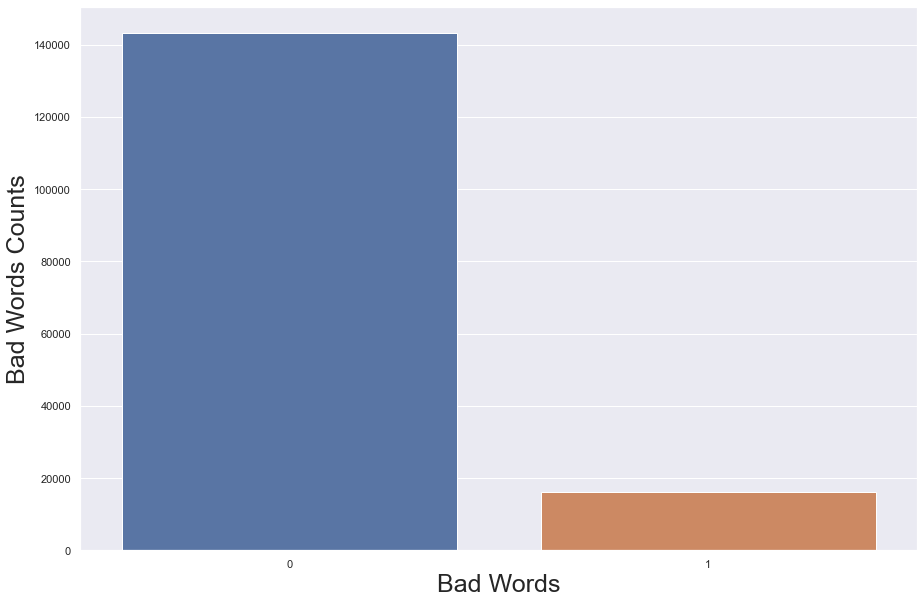

In [45]:
sns.set()
plt.figure(figsize=(15,10))
sns.countplot(x="bad" , data = df)
plt.xlabel("Bad Words",fontsize=25)
plt.ylabel("Bad Words Counts",fontsize=25)
plt.show()

In [46]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [47]:
df.shape

(159571, 11)

In [48]:
df1.shape

(153164, 2)

In [49]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [50]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [51]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9553183489304813
[[42729   221]
 [ 1918  3004]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [52]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9399857954545454
[[41598  1352]
 [ 1521  3401]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [53]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988630157834896
Test accuracy is 0.9547543449197861
[[42409   541]
 [ 1625  3297]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [54]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [55]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



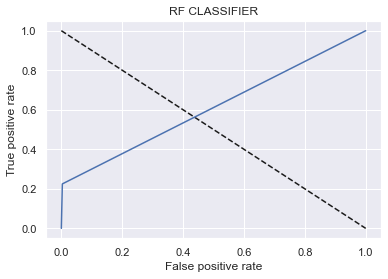

In [56]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [57]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0709 ± 0.0553,fuck
0.0412 ± 0.0430,fucking
0.0286 ± 0.0304,shit
0.0220 ± 0.0194,suck
0.0195 ± 0.0108,idiot
0.0187 ± 0.0141,stupid
0.0184 ± 0.0215,bitch
0.0167 ± 0.0149,asshole
0.0119 ± 0.0099,faggot
0.0113 ± 0.0121,dick


In [58]:
test_result =tf_vec.fit_transform(df1['comment_text'])
test_result

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [59]:
predict=RF.predict(test_result)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
import joblib
joblib.dump(RF,"word.pkl")

['word.pkl']

In [63]:
predict=pd.DataFrame(predict)
file_name="data.xlsx"
predict.to_excel(file_name)
print("data is transferred successfully")

data is transferred successfully
